## Init

In [1]:
repo = "https://github.com/ventus550/HandwritingRecognition"
! ! (git status 2> /dev/null) && git clone {repo}
%cd ShapeCorrection

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../.gitignore

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	./

no changes added to commit (use "git add" and/or "git commit -a")
[Errno 2] No such file or directory: 'ShapeCorrection'
/home/ventus/Documents/ShapeCorrection/notebooks


In [2]:
import sys
sys.path.append("..")

In [3]:
import numpy as np
from pathlib import Path
from PIL import Image, ImageOps
from matplotlib import pyplot as plt

## Configuration

In [4]:
shape = "ellipse"

In [5]:
BASEDIR = Path().absolute().parent
DESTDIR = BASEDIR / "data"
DATASET = DESTDIR / "regression"
IMGSSRC = DESTDIR / "images"
VRTSSRC = DESTDIR / "vertices"

## Data loading

In [6]:
def read_image(image_path):
    return 1 - np.array(ImageOps.grayscale(Image.open(image_path))) / 255.0

def read_certs(verts_path):
    return np.genfromtxt(verts_path, delimiter=",")

In [7]:
def load_shape(shape):
	images = IMGSSRC / shape
	vertices = VRTSSRC / shape

	for image_path, verts_path in zip(images.iterdir(), vertices.iterdir()):
		img = read_image(image_path)
		vrt = read_certs(verts_path)
		yield img, vrt

In [8]:
def draw_data_point(x, y):
    points = x.shape * y
    plt.figure(dpi=50)
    plt.axis("off")
    plt.imshow(x, cmap="gray", )
    plt.scatter(points[:, 0], points[:, 1], linewidths=10)

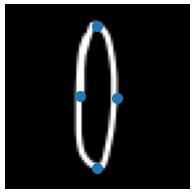

In [9]:
draw_data_point(*next(load_shape("ellipse")))

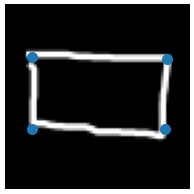

In [10]:
draw_data_point(*next(load_shape("rectangle")))

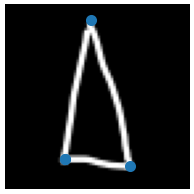

In [11]:
draw_data_point(*next(load_shape("triangle")))

## Data saving

In [12]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [13]:
def save_shape(shape):
	X, Y = list(zip(*load_shape(shape)))
	X, Y = np.array(X, dtype=np.float32), np.array(Y, dtype=np.float32)
	X, Y = unison_shuffled_copies(X, Y)
	np.savez(DATASET / shape, X, Y)

In [14]:
DATASET.mkdir(exist_ok=True)
save_shape("ellipse")
save_shape("rectangle")
save_shape("triangle")

## Test serialization

In [15]:
X, Y = np.load(DATASET / "ellipse.npz").values()

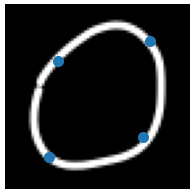

In [16]:
draw_data_point(X[0], Y[0])

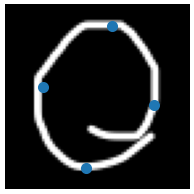

In [17]:
draw_data_point(X[1], Y[1])